In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from IPython.display import display


# Exploratory Data Analysis of Nutrient Content and Consumption

## Author: Tsvetan Dimitrov

### Abstract
The goal of this survey is to detect what are actually people eating and how much of it (broken down in its nutrient content). The first dataset we are going to use is the Open Food Facts dataset where we are going to detect how much sugar, salt, sodium, protein and fat are the different countries consuming per 100g of food. Next we will use a dataset containing nutrition facts about McDonalds menu, which is one of the most popular types of food available worldwide.

With this data, I want to create a nutritional heatmap. This data, however, does not show us what people actually eat on any sort of basis, but it does show us what may be readily available to each user who uploads information. Since some countries may dominate the dataset in terms of number of uploads, we have to be cognizant of the fact that aggregated information from countries with fewer entries may not be as accurate as countries with many entries. For example, a country with 100,000 entries and a mean sugar value per 100g of 20g is probably more reliable than a country with 50 entries and a mean sugar value per 100g of 35g, and the latter's true mean sugar content may not actually be much higher than that of the former.

### Open Food Facts
This data does not show us what people actually eat on any sort of basis, but it does show us what may be readily available to each user who uploads information. To accomplish the task set out above, we will aggregate the data by country and take mean values for sugar, salt, sodium, protein and fat per 100g as well as the number of entries used to calculate that mean. First we are going to read the dataset:

In [6]:
food_facts = pd.read_csv('data/en.openfoodfacts.org.products.tsv', low_memory=False, sep='\t')
pd.set_option("display.max_columns", len(food_facts.columns))
food_facts.head()

163


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

In [7]:
food_facts.shape

(356027, 163)

In [9]:
list(food_facts.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

First we need to return mean values as well as number of values. Not all countries have nutrition data (some may have very few entries and there may not be any entries for the nutrient in question) so we set those mean values to `sys.maxsize` so that they can be filtered out later.

In [13]:
def get_nutrient_info(dataset, country, nutrient):
    country_df = dataset[(dataset['countries_en'] == country)][f'{nutrient}_100g']
    num_null = len(country_df[country_df.isnull()])
    nutrient_list = list(country_df[country_df.notnull()])     
    num_not_null = len(nutrient_list)
    
    perc_not_null = num_not_null / (num_not_null + num_null)
    
    if len(nutrient_list) == 0:
        nutrient_mean = sys.maxsize
    else:
        nutrient_mean = np.mean(nutrient_list)
        
    return nutrient_mean, num_null, num_not_null, perc_not_null

There are three features that show us country information: `"countries"`,`"countries_en"` and `"countries_tags"`. We need to decide which feature to use. Unfortunately, there is not very much information regarding the features, so we have to do a bit of guesswork. Let's explore after setting up a dictionary per country where "countries_en" are the keys and related "countries" are the values:

In [19]:
# Create a dictionary where "countries_en" are the keys and "countries" are the values
def get_all_country_names(dataset):
    all_country_list = []
    for country in list(dataset['countries_en'].unique()):
        try:
            if len(country.split(',')) == 1:
                all_country_list.append(country)
        except:
            print('Error:', country)

    all_country_dict = {}
    # Add other aliases of a country name, e.g. United States, US, etc.
    for country in all_country_list:
        all_country_dict[country] = list(dataset[dataset['countries_en'] == country]['countries'].unique())
    dataset.countries_tags.unique()
    return all_country_dict

It becomes apparent that `"countries"` is far more variable than `"countries_en"` where `"countries_en"` serves as an aggregation of `"countries"`. As shown below, the United States may be represented as any of the 14 different names in the `"countries"` feature, but it is represented as a whole as *"United States"* in the `"countries_en"` feature. We can imagine how difficult it might be to parse through each entry in `"countries"` to determine what all the different levels refer to, so keeping it high level with `"countries_en"` is in our best interest.

In [22]:
all_country_dict = get_all_country_names(food_facts)
all_country_dict['United States']

Error: nan


['US',
 'United States',
 'Usa',
 'États-Unis',
 'en:US',
 'USA',
 'united-states',
 'United states',
 'Etats-Unis',
 'United States of America',
 'Estados Unidos',
 'en:US, US',
 'Соединённые Штаты Америки',
 'Vereinigte Staaten von Amerika']

Now we need to specify which nutrients we want to measure:

In [25]:
MEASURED_NUTRIENTS = ['sugars', 'salt', 'sodium', 'proteins', 'fat']

Next we need a function to associate country names with their nutrient consumption per 100g. We will extract average nutrient values per country as well as how many relevent entries have been made by users:

In [26]:
def collect_nutrient_stats_per_country(dataset, all_country_dict, nutrients=MEASURED_NUTRIENTS):
    nutrient_dict = {}
    for country in list(all_country_dict.keys()):
        nutrient_dict[country] = []

    # Fill in the empty dictionary with all nutrition info and entry counts per country
    for nutrient in nutrients:
        for country in list(all_country_dict.keys()):
            nutrient_dict[country] = nutrient_dict[country] + list(get_nutrient_info(dataset, country, nutrient))
    return nutrient_dict

After building a dictionary with the above mentioned data we can examine, e.g. the entry for the _United States_ where we get all needed numerical values which at this point we do not know which is which.

In [27]:
nutrient_dict = collect_nutrient_stats_per_country(food_facts, all_country_dict)
nutrient_dict['United States']

[17.182560511423965,
 13057,
 160102,
 0.9245953141332532,
 2.4502524585372996,
 2379,
 170780,
 0.9862611819195075,
 0.9646650547648447,
 2379,
 170780,
 0.9862611819195075,
 6.811524055274704,
 2448,
 170711,
 0.9858627042198211,
 12.40674908009859,
 1945,
 171214,
 0.9887675489001438]

Next step is to build a Pandas Dataframe with named features and our aggregated data as observations. We generate a mean value, count of null values, count of not null values and the percentage of not null value for each measured nutrient.

In [28]:
# Create feature names before transforming from dictionary to dataframe
def create_dataframe_with_features(nutrient_dict, nutrients=MEASURED_NUTRIENTS):
    df_columns = []
    for nutrient in nutrients:
        df_columns = df_columns + [f'avg_{nutrient}',
                                   f'{nutrient}_nulls',
                                   f'{nutrient}_not_nulls',
                                   f'{nutrient}_perc_not_nulls']
    
    # Transform the dictionary into a dataframe and display
    nutrient_df = pd.DataFrame.from_dict(nutrient_dict).T
    nutrient_df = nutrient_df.reset_index(drop=False)
    nutrient_df.columns = ['country'] + df_columns
    pd.set_option("display.max_columns", len(nutrient_df.columns))
    
    return nutrient_df

In [30]:
nutrient_df = create_dataframe_with_features(nutrient_dict)
print(f'Countries count: {len(nutrient_df)}')
nutrient_df.head()

Countries count: 184


,country,avg_sugars,sugars_nulls,sugars_not_nulls,sugars_perc_not_nulls,avg_salt,salt_nulls,salt_not_nulls,salt_perc_not_nulls,avg_sodium,sodium_nulls,sodium_not_nulls,sodium_perc_not_nulls,avg_proteins,proteins_nulls,proteins_not_nulls,proteins_perc_not_nulls,avg_fat,fat_nulls,fat_not_nulls,fat_perc_not_nulls
0,France,13.245944,33503.0,90458.0,0.729730,1.168167,33454.0,90507.0,0.730125,0.459923,33457.0,90504.0,0.730101,7.825472,32001.0,91960.0,0.741846,13.264426,47219.0,76742.0,0.619082
1,United States,17.182561,13057.0,160102.0,0.924595,2.450252,2379.0,170780.0,0.986261,0.964665,2379.0,170780.0,0.986261,6.811524,2448.0,170711.0,0.985863,12.406749,1945.0,171214.0,0.988768
2,United Kingdom,14.742229,3501.0,1591.0,0.312451,0.999861,3513.0,1579.0,0.310094,0.393891,3514.0,1578.0,0.309898,7.563118,3482.0,1610.0,0.316182,14.303966,3464.0,1628.0,0.319717
3,Canada,16.857270,762.0,211.0,0.216855,1.942977,763.0,210.0,0.215827,0.764317,763.0,210.0,0.215827,7.134494,758.0,215.0,0.220966,13.492484,756.0,217.0,0.223022
4,Switzerland,15.448753,5056.0,9876.0,0.661398,1.185391,5349.0,9583.0,0.641776,0.468596,5388.0,9544.0,0.639164,6.993326,4265.0,10667.0,0.714372,13.363781,4217.0,10715.0,0.717586


In [31]:
nutrient_df.country

0                        France
1                 United States
2                United Kingdom
3                        Canada
4                   Switzerland
5                         Spain
6                       Germany
7                      Slovenia
8                    Bangladesh
9                         Italy
10                      Romania
11                    Australia
12                     Portugal
13                   Guadeloupe
14           Dominican Republic
15                  Netherlands
16                      Ireland
17                       Taiwan
18                       Brazil
19                       Mexico
20                 Saudi Arabia
21         United Arab Emirates
22                         Iraq
23                       Kuwait
24                      Moldova
25                New Caledonia
26                    Singapore
27                      Finland
28             French Polynesia
29                       Panama
                 ...           
154     

It is time to do some cleanup. We can notice from the `"country"` column that there are some weird entries. First we want to remove all non English ones and some bad definitions of a country like, e.g. _European Union_, _World_, etc.
Additionally we have to filter those countries with no available nutrition data which we previously marked with `sys.maxsize`.

In [33]:
def drop_invalid_country_entries(nutrient_df): 
    countries_without_data = np.logical_not((nutrient_df == sys.maxsize).any(1))
    
    drop_countries = [
        'European Union', 
        'Other-japon', 
        'Other-turquie',              
        'World',
        'fr:Quebec', 
        'الإمارات-العربية-المتحدة',
        'السعودية',
        'تونس',
        'سلطنة-عمان'
        'لبنان',
        '香港',
        'भारत'
    ]
    inaccurate_countries = np.logical_not(nutrient_df['country'].isin(drop_countries))

    return nutrient_df[countries_without_data & inaccurate_countries]

In [35]:
cleaned_nutrient_df = drop_invalid_country_entries(nutrient_df)
print(f'Countries count: {len(cleaned_nutrient_df)}')

Countries count: 84


We are not done with filtering. Since some countries may dominate the dataset in terms of number of uploads, we have to be aware of the fact that aggregated information from countries with fewer entries may not be as accurate as countries with many entries. For example, a country with 10 000 entries and a mean sugar value per 100g of 20g is probably more reliable than a country with 50 entries and a mean sugar value per 100g of 40g, and the latter's true mean sugar content may not actually be much higher than that of the former. So we need to define an entry count threshold that we think should provide enough data to give accurate results. Based on some experimentation I chose 100 entries as our threshold.

In [53]:
def filter_above_nutrient_entry_count_threshold(dataset, entry_count_threshold, nutrients=MEASURED_NUTRIENTS):
    filter_query = ' & '.join([f'{nutrient}_not_nulls > {entry_count_threshold}' for nutrient in nutrients])
    print(f'FILTER QUERY: {filter_query}')
    return dataset.query(filter_query)

filtered_nutrient_df = filter_above_nutrient_entry_count_threshold(cleaned_nutrient_df, 150)
print(f'Countries count {len(filtered_nutrient_df)}')
filtered_nutrient_df

FILTER QUERY: sugars_not_nulls > 150 & salt_not_nulls > 150 & sodium_not_nulls > 150 & proteins_not_nulls > 150 & fat_not_nulls > 150
Countries count 14


,country,avg_sugars,sugars_nulls,sugars_not_nulls,sugars_perc_not_nulls,avg_salt,salt_nulls,salt_not_nulls,salt_perc_not_nulls,avg_sodium,sodium_nulls,sodium_not_nulls,sodium_perc_not_nulls,avg_proteins,proteins_nulls,proteins_not_nulls,proteins_perc_not_nulls,avg_fat,fat_nulls,fat_not_nulls,fat_perc_not_nulls
0,France,13.245944,33503.0,90458.0,0.729730,1.168167,33454.0,90507.0,0.730125,0.459923,33457.0,90504.0,0.730101,7.825472,32001.0,91960.0,0.741846,13.264426,47219.0,76742.0,0.619082
1,United States,17.182561,13057.0,160102.0,0.924595,2.450252,2379.0,170780.0,0.986261,0.964665,2379.0,170780.0,0.986261,6.811524,2448.0,170711.0,0.985863,12.406749,1945.0,171214.0,0.988768
2,United Kingdom,14.742229,3501.0,1591.0,0.312451,0.999861,3513.0,1579.0,0.310094,0.393891,3514.0,1578.0,0.309898,7.563118,3482.0,1610.0,0.316182,14.303966,3464.0,1628.0,0.319717
3,Canada,16.857270,762.0,211.0,0.216855,1.942977,763.0,210.0,0.215827,0.764317,763.0,210.0,0.215827,7.134494,758.0,215.0,0.220966,13.492484,756.0,217.0,0.223022
4,Switzerland,15.448753,5056.0,9876.0,0.661398,1.185391,5349.0,9583.0,0.641776,0.468596,5388.0,9544.0,0.639164,6.993326,4265.0,10667.0,0.714372,13.363781,4217.0,10715.0,0.717586
5,Spain,11.812996,2850.0,2679.0,0.484536,1.042040,2823.0,2706.0,0.489419,0.410252,2823.0,2706.0,0.489419,5.923319,2403.0,3126.0,0.565383,12.732786,2394.0,3135.0,0.567010
6,Germany,13.749804,3508.0,4962.0,0.585832,1.074104,3512.0,4958.0,0.585360,0.422875,3512.0,4958.0,0.585360,8.619885,3467.0,5003.0,0.590673,15.455744,3429.0,5041.0,0.595159
9,Italy,11.725142,1046.0,387.0,0.270063,1.038067,1047.0,386.0,0.269365,0.408682,1047.0,386.0,0.269365,7.331877,879.0,554.0,0.386602,10.643563,880.0,553.0,0.385904
11,Australia,13.637814,1661.0,540.0,0.245343,3.332763,1665.0,536.0,0.243526,1.312109,1665.0,536.0,0.243526,6.750193,1683.0,518.0,0.235348,10.940448,1667.0,534.0,0.242617
12,Portugal,13.145686,388.0,350.0,0.474255,1.248664,384.0,354.0,0.479675,0.491593,384.0,354.0,0.479675,7.147401,361.0,377.0,0.510840,13.356535,357.0,381.0,0.516260


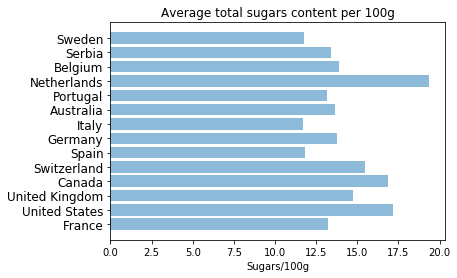

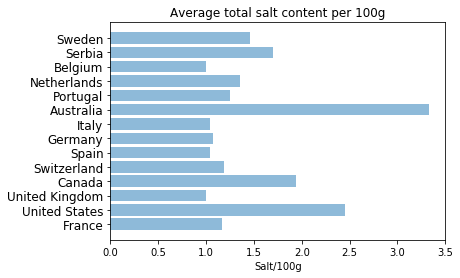

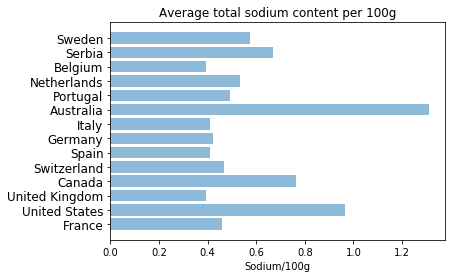

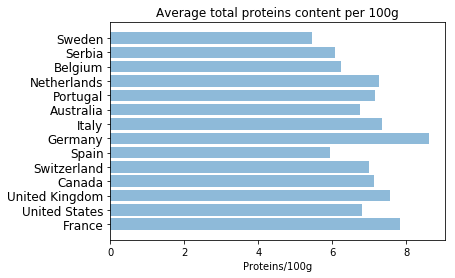

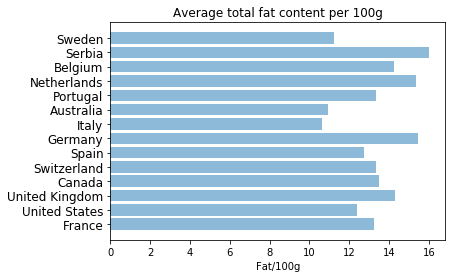

In [56]:
def plot_nutrient_consumption_per_country(dataset, nutrient):
    x_pos = np.arange(len(dataset.country))
    plt.barh(x_pos, dataset[f'avg_{nutrient}'], align='center', alpha=0.5)
    plt.title(f'Average total {nutrient} content per 100g')
    plt.yticks(x_pos, dataset.country, fontsize = 12)
    plt.xlabel(f'{nutrient.title()}/100g')
    plt.show()

for nutrient in MEASURED_NUTRIENTS:
    plot_nutrient_consumption_per_country(filtered_nutrient_df, nutrient)

### Find correlations in numerical features

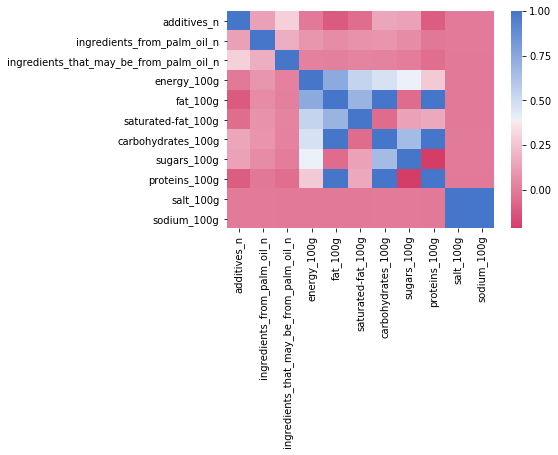

In [52]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = food_facts[['additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g','fat_100g',
                   'saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']].corr()
sns.heatmap(correlations, cmap=cmap)

In [75]:
mcdonalds_data = pd.read_csv('data/menu.csv')
pd.set_option("display.max_columns", len(mcdonalds_data.columns))
mcdonalds_data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [78]:
print(mcdonalds_data.shape)
mcdonalds_data.describe()

(260, 24)


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [109]:
NUTRIENT_CATEGORIES = ['Cholesterol', 'Sugars', 'Sodium', 'Carbohydrates', 'Protein', 'Saturated Fat', 'Trans Fat', 'Total Fat', 'Dietary Fiber']

In [110]:
def get_menu_categories_per_max_nutrient_content(dataset, nutrient):
    x = max(dataset[nutrient])
    filtered_dataset = dataset[(dataset[nutrient] == x)]
    return filtered_dataset[['Category', 'Item', nutrient]]

for nutrient in NUTRIENT_CATEGORIES:
    df = get_menu_categories_per_max_nutrient_content(mcdonalds_data, nutrient)
    display(df)

,Category,Item,Cholesterol
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),575
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),575


,Category,Item,Sugars
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),128


,Category,Item,Sodium
82,Chicken & Fish,Chicken McNuggets (40 piece),3600


,Category,Item,Carbohydrates
249,Smoothies & Shakes,Chocolate Shake (Large),141


,Category,Item,Protein
82,Chicken & Fish,Chicken McNuggets (40 piece),87


,Category,Item,Saturated Fat
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),20.0
82,Chicken & Fish,Chicken McNuggets (40 piece),20.0
231,Coffee & Tea,Frappé Chocolate Chip (Large),20.0
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),20.0


,Category,Item,Trans Fat
47,Beef & Pork,Double Quarter Pounder with Cheese,2.5


,Category,Item,Total Fat
82,Chicken & Fish,Chicken McNuggets (40 piece),118.0


,Category,Item,Dietary Fiber
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),7
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,7
88,Salads,Premium Southwest Salad with Crispy Chicken,7
89,Salads,Premium Southwest Salad with Grilled Chicken,7


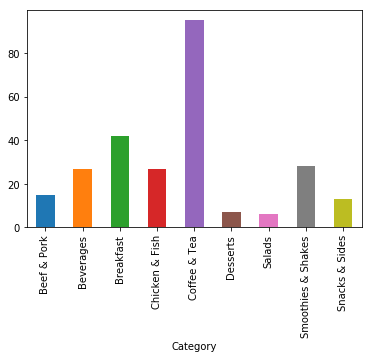

In [111]:
mcdonalds_data.groupby('Category')['Item'].count().plot(kind='bar')

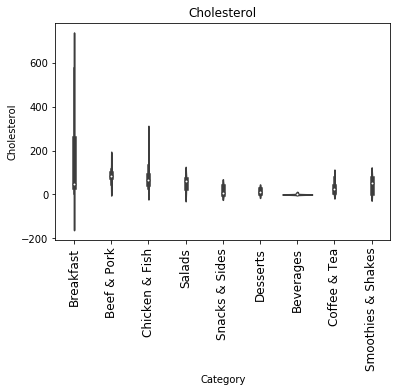

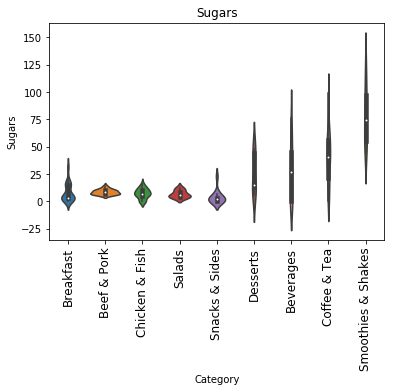

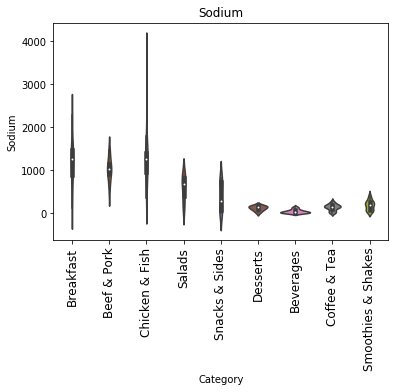

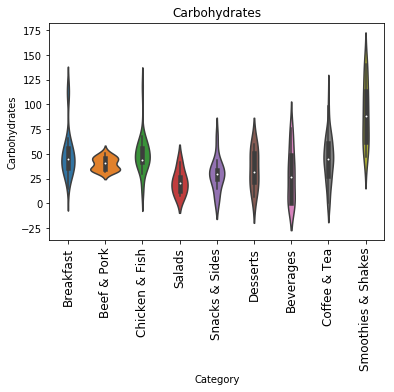

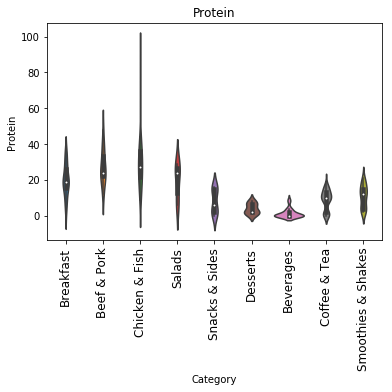

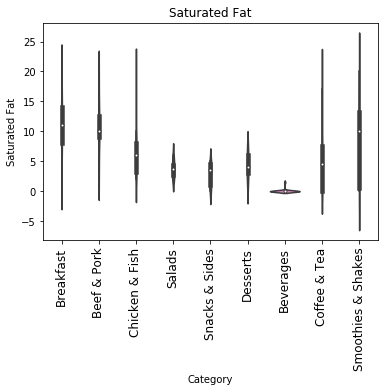

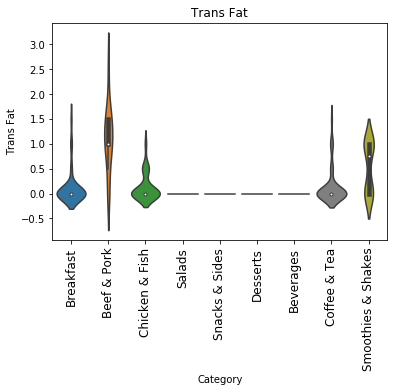

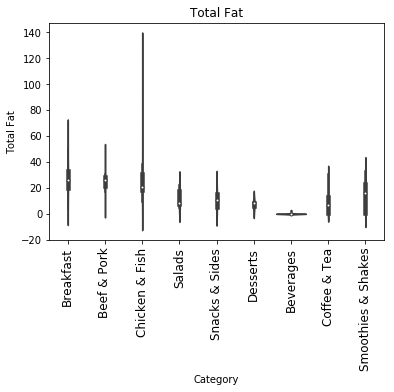

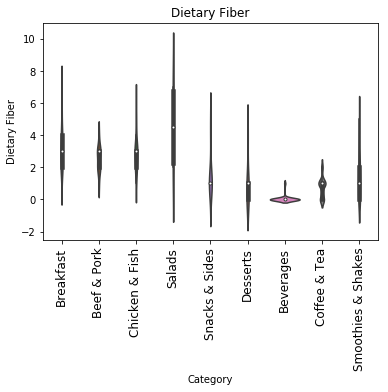

In [112]:
for nutrient in NUTRIENT_CATEGORIES:   
    plot = sns.violinplot(x="Category", y=nutrient, data=mcdonalds_data)
    plt.xticks(rotation=90, size=12)
    plt.title(nutrient)
    plt.show()